# Dealing with Categorical Variables

## Introduction

So far, we have assumed that our predictors (independent variables) are numeric. How can we incorporate categorical data into our regression models as well? This lesson demonstrates how to use an approach called one-hot encoding to do just this.

## Objectives

You will be able to:

- Determine whether variables are categorical or numeric
- Describe why dummy variables are necessary
- Use one-hot encoding to create dummy variables

## Variable Types: Numeric and Categorical

Let's look at the Auto MPG dataset:

In [1]:
import pandas as pd
data = pd.read_csv("auto-mpg.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


We'll also engineer a new feature, `make`, using the `car name` feature:

In [2]:
data["make"] = data["car name"].str.split().apply(lambda x: x[0])
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,make
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,ford
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,vw
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,dodge
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,ford


We can look at the `pandas` data types for this dataset using `.info()`:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   make          392 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 30.8+ KB


Without digging any further into the _meaning_ of these columns, this print-out tells us that we _can_ use all columns except for `car name` and `make` in a multiple linear regression, without the model crashing.

However a better modeling process would attempt to make a distinction between which of the variables are genuinely representing numbers, and which are actually representing categories.

### Numeric Variables

Numeric variables can be either continuous or discrete.

***Continuous*** variables correspond to "real numbers" in mathematics, and floating point numbers in code. Essentially these variables can have any value on the number line, and usually have a decimal place in their code representation.

***Discrete*** numeric variables typically correspond to "whole numbers" in mathematics, and integers in code. These variables have gaps between their values.

Below we plot `weight`, an example of a continuous variable, and `model year`, an example of a discrete variable, vs. the target, `mpg`.

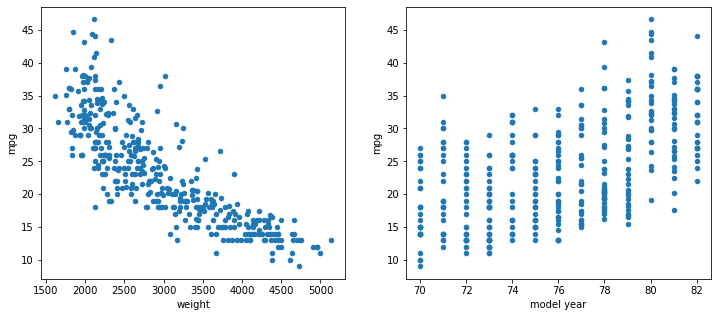

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

data.plot.scatter(x="weight", y="mpg", ax=ax1)
data.plot.scatter(x="model year", y="mpg", ax=ax2);

You can tell that `model year` is discrete because of the gaps between the vertical lines of values, whereas `weight` is continuous because it's more filled in, like a "cloud", and doesn't have those gaps.

### Categorical Variables

Categorical variables can actually be strings _or_ numbers.

***String*** categorical variables will be fairly obvious due to their data type (`object` in `pandas`). For example, `make` is a categorical variable. It cannot be used in a scatter plot, and it will cause an error if you try to use it in a multiple regression model without additional transformations.

However it can be represented by a bar plot. For example, we can plot the mean `mpg`, grouped by `make`.

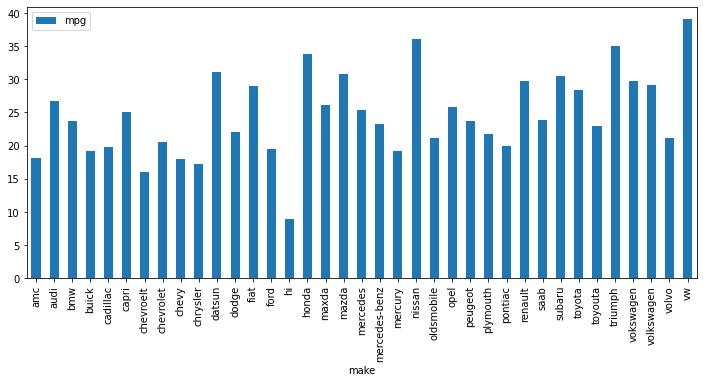

In [5]:
fig, ax = plt.subplots(figsize=(12,5))
data.groupby("make").mean().plot.bar(y="mpg", ax=ax);

***Discrete*** number categorical variables can be more difficult to spot. For example, `origin` is actually a categorical variable in this dataset, even though it is encoded as a number.

In [6]:
data["origin"].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

An `origin` of 1 means the car maker is from the United States, 2 means the car maker is from Europe, and 3 means the car maker is from Asia.

In [7]:
data[["make", "origin"]].groupby("make").first().sort_values("origin")

,origin
make,
amc,1
plymouth,1
pontiac,1
hi,1
ford,1
dodge,1
mercury,1
chrysler,1
oldsmobile,1


Discrete categorical variables like `origin` can be represented with either a scatter plot or a bar plot.

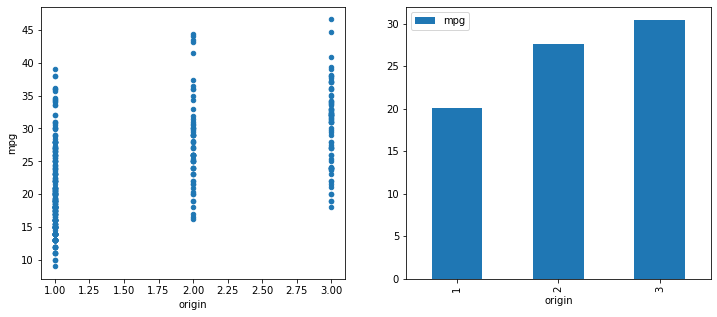

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

data.plot.scatter(x="origin", y="mpg", ax=ax1)
data.groupby("origin").mean().plot.bar(y="mpg", ax=ax2);

### Identifying Numeric vs. Categorical Variables

In some cases, the data type clearly indicates what kind of variable it should be. A **continuous** variable is essentially always **numeric**, and a **string** variable is essentially always **categorical**.

For **discrete** variables, you need to investigate the values as well as any provided documentation. Then ask yourself:

> Is an increase of 2 in this variable twice as much as an increase of 1?

If 2 is "twice as much" as 1, that means it is reasonable to treat the variable as a numeric discrete variable. If not, the variable should be treated as categorical.

Going back to our examples above:

* `model year`: Is an increase of 2 years twice as much as an increase of 1 year?
  * This seems like a reasonable way to think about the data, so we'll treat it as numeric
* `origin`: Is an increase of 2 (US to Asia) twice as much as an increase of 1 (US to Europe, or Europe to Asia)?
  * It's hard to make sense of this. Treating `origin` as categorical makes a lot more sense

## Transforming Categorical Variables with One-Hot Encoding

In order to use a categorical variable in a model, we'll create multiple ***dummy variables***, one for each category of the categorical variable.

First we'll walk through how this could be done step-by-step, then show you the `get_dummies` method that can achieve this more quickly and efficiently.

### Creating Dummy Variables from Scratch

Let's create a copy of our data that only includes the `origin` column.

In [9]:
origin_df = data[["origin"]].copy()
origin_df.sample(10, random_state=1)

,origin
81,3
165,3
351,3
119,2
379,3
236,1
78,2
92,1
80,3
333,3


The intuition here is, _what if we create a column that just says whether `origin` is equal to 1?_

We might do something like this:

In [10]:
origin_df["origin_us"] = origin_df["origin"] == 1
origin_df.sample(10, random_state=1)

,origin,origin_us
81,3,False
165,3,False
351,3,False
119,2,False
379,3,False
236,1,True
78,2,False
92,1,True
80,3,False
333,3,False


Except, our model is expecting _integers_, not _booleans_, so we convert `True` to 1 and `False` to 0:

In [11]:
origin_df["origin_us"] = (origin_df["origin"] == 1).apply(int)
origin_df.sample(10, random_state=1)

,origin,origin_us
81,3,0
165,3,0
351,3,0
119,2,0
379,3,0
236,1,1
78,2,0
92,1,1
80,3,0
333,3,0


Then we could repeat the process for European origin and Asian origin:

In [12]:
origin_df["origin_eu"] = (origin_df["origin"] == 2).apply(int)
origin_df["origin_as"] = (origin_df["origin"] == 3).apply(int)
origin_df.sample(10, random_state=1)

,origin,origin_us,origin_eu,origin_as
81,3,0,0,1
165,3,0,0,1
351,3,0,0,1
119,2,0,1,0
379,3,0,0,1
236,1,1,0,0
78,2,0,1,0
92,1,1,0,0
80,3,0,0,1
333,3,0,0,1


Each of these newly-created variables, `us_origin`, `eu_origin`, and `as_origin`, are _dummy_ variables. They are called this because the "real" variable is `origin`, and these are just stand-ins.

The overall process of creating a dummy variable for each value of `origin` is called ***one-hot encoding***. The name "one-hot" comes from digital circuitry, and it means that when you look across all of the dummy variables from one original variable, only one of them should have a value of 1, and the rest should be 0.

### One-Hot Encoding with `pandas`

Instead of creating a new line of code for each value of a column, you can use the `get_dummies` function from `pandas` ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).

In [13]:
origin_df = data[["origin"]].copy()
origin_df.sample(10, random_state=1)

,origin
81,3
165,3
351,3
119,2
379,3
236,1
78,2
92,1
80,3
333,3


In [14]:
origin_df = pd.get_dummies(origin_df, columns=["origin"])
origin_df

,origin_1,origin_2,origin_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
387,1,0,0
388,0,1,0
389,1,0,0
390,1,0,0


Some things to note about this version of one-hot encoding:

* The original column (`origin`) has been removed
* The names of the new columns come from the original column name `"origin"` + `_` + the value (1, 2, or 3)
  * If you want these to be more descriptive, consider changing their values _before_ one-hot encoding. For example, you could replace 1, 2, and 3 with "us", "eu", and "as" to be more similar to the example above. This choice is up to you, since these are the names that will appear in the regression results

We can also do one-hot encoding on the entire DataFrame at once, just specifying the columns we consider to be categorical:

In [15]:
pd.get_dummies(data, columns=["origin", "make"])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,...,make_renault,make_saab,make_subaru,make_toyota,make_toyouta,make_triumph,make_vokswagen,make_volkswagen,make_volvo,make_vw
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,...,0,0,0,0,0,0,0,0,0,0
388,44.0,4,97.0,52,2130,24.6,82,vw pickup,0,1,...,0,0,0,0,0,0,0,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,...,0,0,0,0,0,0,0,0,0,0
390,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,...,0,0,0,0,0,0,0,0,0,0


## The Dummy Variable Trap

Due to the nature of how dummy variables are created, one variable can be predicted from all of the others. For example, if you know that `origin_1` is 0 and `origin_2` is 0, then you already know that `origin_3` must be 1.

We demonstrate this in code below.

In [16]:
origin_df["origin_1_prediction"] = 1 - origin_df["origin_2"] - origin_df["origin_3"]
origin_df

,origin_1,origin_2,origin_3,origin_1_prediction
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
387,1,0,0,1
388,0,1,0,0
389,1,0,0,1
390,1,0,0,1


Our `origin_1_prediction` matches our `origin_1` value 100% of the time:

In [17]:
(origin_df["origin_1_prediction"] == origin_df["origin_1"]).value_counts(normalize=True)

True    1.0
dtype: float64

This is known as perfect ***multicollinearity*** and it can be a problem for regression. Multicollinearity will be covered in depth later but the basic idea behind perfect multicollinearity is that you can *perfectly* predict what one variable will be using some combination of the other variables.

When features in a linear regression have perfect multicollinearity due to the algorithm for creating dummy variables, this is known as the ***dummy variable trap***.

Fortunately, the dummy variable trap can be avoided by simply dropping one of the dummy variables. You can do this by subsetting the dataframe manually or, more conveniently, by passing `drop_first=True` into `get_dummies()`: 

In [18]:
pd.get_dummies(data, columns=["origin"], drop_first=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,make,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,chevrolet,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,buick,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,plymouth,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,amc,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,ford,0,0
...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,ford,0,0
388,44.0,4,97.0,52,2130,24.6,82,vw pickup,vw,1,0
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage,dodge,0,0
390,28.0,4,120.0,79,2625,18.6,82,ford ranger,ford,0,0


Because this dataframe no longer includes `origin_1`, there is no longer enough information to perfectly predict `origin_2` or `origin_3`. The perfect multicollinearity has been eliminated!

## Multiple Regression with One-Hot Encoded Variables

Let's go ahead and create a linear regression model with `weight`, `model year`, and `origin`.

In [19]:
y = data["mpg"]
X = data[["weight", "model year", "origin"]]
X

,weight,model year,origin
0,3504,70,1
1,3693,70,1
2,3436,70,1
3,3433,70,1
4,3449,70,1
...,...,...,...
387,2790,82,1
388,2130,82,2
389,2295,82,1
390,2625,82,1


In [20]:
X = pd.get_dummies(X, columns=["origin"], drop_first=True)
X

,weight,model year,origin_2,origin_3
0,3504,70,0,0
1,3693,70,0,0
2,3436,70,0,0
3,3433,70,0,0
4,3449,70,0,0
...,...,...,...,...
387,2790,82,0,0
388,2130,82,1,0
389,2295,82,0,0
390,2625,82,0,0


In [21]:
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     437.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.53e-142
Time:                        16:04:22   Log-Likelihood:                -1026.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     387   BIC:                             2082.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.3069      4.017     -4.557      0.0

### Interpreting Model Results

Now, how do we interpret these results?

Just like any other multiple regression model, we can look at the F-statistic p-value to see if it's statistically significant (it is!) and at the adjusted R-Squared to see the proportion of variance explained (around 82%).

The `weight`, and `model year` interpretations are also very similar to previous models we've created. For each increase of 1 lb in weight, we see an associated drop of about 0.006 MPG. For each increase of 1 in model year, we see an associated increase of about 0.77 MPG.

Dropping the first variable affects the interpretation of the other regression coefficients. The dropped category becomes what is known as the ***reference category***. The regression coefficients that result from fitting the remaining variables represent the change *relative* to the reference.

In this regression, an `origin` of 1 (i.e. US origin) is the reference category. This has implications for the interpretation of `const` as well as the other `origin` features.

First, `const` means that all other variables are 0. This means `weight` is 0, `model year` is 0, and `origin` is category 1 (i.e. US origin).

`origin_2` means the difference associated with a car being from a European car maker vs. a US car maker. In other words, compared to US car makers, we see an associated increase of about 2 MPG for European car makers.

`origin_3` is also comparing to US car makers. We see an associated increase of about 2.2 MPG for Asian car makers compared to US car makers.

## Level Up: One-Hot Encoding with Scikit-Learn

The machine learning library scikit-learn also has functionality for one-hot encoding ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)). It is essential to use this approach to one-hot encoding in a predictive machine learning context, and optional to use it in an inferential context like we are currently using.

In [22]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse=False)

This approach does not allow you to specify certain columns and pass the entire dataframe in. Instead, you need to create a dataframe with only the column(s) that require one-hot encoding.

For this example we'll select just `origin`.

In [23]:
data_cat = data[["origin"]].copy()
data_cat

,origin
0,1
1,1
2,1
3,1
4,1
...,...
387,1
388,2
389,1
390,1


The result from the scikit-learn one-hot encoder is also not a dataframe.

In [24]:
ohe.fit_transform(data_cat)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.

We will need to create a new dataframe ourselves.

In [25]:
data_cat_ohe = pd.DataFrame(
    data=ohe.fit_transform(data_cat),
    columns=[f"origin_{cat}" for cat in ohe.categories_[0][1:]]
)
data_cat_ohe

,origin_2,origin_3
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
387,0.0,0.0
388,1.0,0.0
389,0.0,0.0
390,0.0,0.0


Then we can append the one-hot encoded data back with the numeric data to create an overall X dataframe:

In [26]:
X_sklearn = pd.concat([data[["weight", "model year"]], data_cat_ohe], axis=1)
X_sklearn

,weight,model year,origin_2,origin_3
0,3504,70,0.0,0.0
1,3693,70,0.0,0.0
2,3436,70,0.0,0.0
3,3433,70,0.0,0.0
4,3449,70,0.0,0.0
...,...,...,...,...
387,2790,82,0.0,0.0
388,2130,82,1.0,0.0
389,2295,82,0.0,0.0
390,2625,82,0.0,0.0


Then we can plug that dataframe into the model, with the same results as `pd.get_dummies`:

In [27]:
model_2 = sm.OLS(y, sm.add_constant(X_sklearn))
results_2 = model_2.fit()

print(results.params)
print(results_2.params)

const        -18.306944
weight        -0.005887
model year     0.769849
origin_2       1.976306
origin_3       2.214534
dtype: float64
const        -18.306944
weight        -0.005887
model year     0.769849
origin_2       1.976306
origin_3       2.214534
dtype: float64


This may seem like a lot of extra work, but the key difference is that the scikit-learn `ohe` object "remembers" the categories that it created, and can apply the same transformation to a future dataset. This is necessary in a machine learning context, but you can consider if optional for now.

## Summary

Great! In this lesson, you learned about categorical variables and how they are different from numeric variables. You also learned how to include them in your multiple linear regression model using dummy variables. You also learned about the dummy variable trap and how it can be avoided.